In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_secret_key = 'rXoCM9s8Zug4baosmoqZ52Quo1HTE4APznEqHRdk'

In [4]:
alpaca_api_key = 'PKQ7AGGJ1RU7HOMRQRKM'

In [5]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Joes Monte Carlo Simulation

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["GM","TACO","AUY","BABA","PTON"]

# Get 5 year's worth of historical price data
joes_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
joes_ticker.head()

AUY                                 BABA          \
                           open  high     low close   volume    open    high   
time                                                                           
2018-05-24 00:00:00-04:00  2.84  2.92  2.8258  2.91  8418694  198.12  199.72   
2018-05-25 00:00:00-04:00  2.90  2.94  2.8600  2.86  8681001  197.57  201.50   
2018-05-29 00:00:00-04:00  2.83  2.90  2.8100  2.87  6205123  197.94  202.28   
2018-05-30 00:00:00-04:00  2.88  2.95  2.8730  2.91  7032656  199.70  200.54   
2018-05-31 00:00:00-04:00  2.91  2.94  2.8900  2.92  8482293  198.00  199.48   

                                                       ... PTON           \
                                low   close    volume  ... open high low   
time                                                   ...                 
2018-05-24 00:00:00-04:00  195.6974  197.36  14616812  ...  NaN  NaN NaN   
2018-05-25 00:00:00-04:00  197.2100  199.18  17548460  ...  NaN  NaN NaN   
2018-05-29 00:00:00-04:00  197.0000  197.92  15298659  ...  NaN  NaN NaN   
2018-05-30 00:00:00-04:00  197.5000  198.00  11140140  ...  NaN  NaN NaN   
2018-05-31 00:00:00-04:00  196.8500  198.10  11583622  ...  NaN  NaN NaN   

                                         TACO                                 
                          close volume   open   high    low  close    volume  
time                                                                          
2018-05-24 00:00:00-04:00   NaN    NaN  11.77  11.84  11.53  11.55  183250.0  
2018-05-25 00:00:00-04:00   NaN    NaN  11.54  12.17  11.54  12.07  409256.0  
2018-05-29 00:00:00-04:00   NaN    NaN  12.05  12.12  11.79  11.89  198195.0  
2018-05-30 00:00:00-04:00   NaN    NaN  11.90  12.23  11.90  12.21  187752.0  
2018-05-31 00:00:00-04:00   NaN    NaN  12.26  12.43  12.00  12.03  149811.0  

[5 rows x 25 columns]

In [7]:
# Configure a Monte Carlo simulation to forecast twenty years cumulative returns
joes_MC_even_dist = MCSimulation(
    portfolio_data = joes_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 500,
    num_trading_days = 252*20
)

# Print the simulation input data
joes_MC_even_dist.portfolio_data.head()

AUY                                            \
                           open  high     low close   volume daily_return   
time                                                                        
2018-05-24 00:00:00-04:00  2.84  2.92  2.8258  2.91  8418694          NaN   
2018-05-25 00:00:00-04:00  2.90  2.94  2.8600  2.86  8681001    -0.017182   
2018-05-29 00:00:00-04:00  2.83  2.90  2.8100  2.87  6205123     0.003497   
2018-05-30 00:00:00-04:00  2.88  2.95  2.8730  2.91  7032656     0.013937   
2018-05-31 00:00:00-04:00  2.91  2.94  2.8900  2.92  8482293     0.003436   

                             BABA                            ... PTON        \
                             open    high       low   close  ...  low close   
time                                                         ...              
2018-05-24 00:00:00-04:00  198.12  199.72  195.6974  197.36  ...  NaN   NaN   
2018-05-25 00:00:00-04:00  197.57  201.50  197.2100  199.18  ...  NaN   NaN   
2018-05-29 00:00:00-04:00  197.94  202.28  197.0000  197.92  ...  NaN   NaN   
2018-05-30 00:00:00-04:00  199.70  200.54  197.5000  198.00  ...  NaN   NaN   
2018-05-31 00:00:00-04:00  198.00  199.48  196.8500  198.10  ...  NaN   NaN   

                                                TACO                       \
                          volume daily_return   open   high    low  close   
time                                                                        
2018-05-24 00:00:00-04:00    NaN          NaN  11.77  11.84  11.53  11.55   
2018-05-25 00:00:00-04:00    NaN          NaN  11.54  12.17  11.54  12.07   
2018-05-29 00:00:00-04:00    NaN          NaN  12.05  12.12  11.79  11.89   
2018-05-30 00:00:00-04:00    NaN          NaN  11.90  12.23  11.90  12.21   
2018-05-31 00:00:00-04:00    NaN          NaN  12.26  12.43  12.00  12.03   

                                                  
                             volume daily_return  
time                                              
2018-05-24 00:00:00-04:00  183250.0          NaN  
2018-05-25 00:00:00-04:00  409256.0     0.045022  
2018-05-29 00:00:00-04:00  198195.0    -0.014913  
2018-05-30 00:00:00-04:00  187752.0     0.026913  
2018-05-31 00:00:00-04:00  149811.0    -0.014742  

[5 rows x 30 columns]

In [8]:
# Run a Monte Carlo simulation to forecast twenty years cumulative returns
joes_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001871,1.003470,0.986784,1.006967,0.999474,0.993790,0.982696,1.016568,0.998277,0.974340,...,1.007297,0.996067,0.968052,0.996403,1.010780,0.985866,0.990491,0.984729,1.005783,0.989943
2,1.011177,0.995274,0.996891,1.002577,0.996489,0.995789,0.969101,1.009980,1.007528,0.955925,...,0.993040,0.999506,0.976664,0.992794,0.989511,0.974826,1.006557,1.004885,1.012561,0.990402
3,1.029971,1.001799,0.984608,1.022335,0.999235,0.988894,0.977143,1.003592,1.021157,0.948258,...,0.971806,1.031009,0.956609,1.027942,0.967576,0.965445,1.006368,0.995687,1.026191,0.979539
4,1.022284,0.985739,0.972516,0.999935,1.001508,0.981088,0.990420,1.019015,1.027345,0.967902,...,1.009614,1.024340,0.953691,1.037532,0.967501,0.973684,1.009150,1.015984,1.003052,0.980217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,1490.378852,316.963146,2624.225848,424.926116,663.021777,415.172904,377.267876,645.772457,416.786557,926.408007,...,943.285293,1581.487421,1385.266440,4058.511076,857.843325,5335.144370,872.883801,763.993217,1454.112893,958.413059
5037,1512.672528,327.858555,2591.369177,417.585230,640.149850,410.018458,374.292496,634.843425,412.460077,938.353912,...,938.197203,1575.571358,1391.686544,4061.275923,868.004108,5320.397497,885.470196,748.370141,1419.279476,956.426357
5038,1503.815445,328.060108,2576.288418,418.347295,654.601529,415.493557,371.743599,639.938328,421.212637,934.896579,...,927.680081,1585.841526,1398.440575,4037.867408,867.016896,5348.127583,897.584939,736.142460,1410.363809,974.913586
5039,1506.887648,326.634312,2539.266611,409.535734,658.925839,402.066287,372.868848,657.735905,424.462513,948.689216,...,927.433409,1574.437401,1391.366729,4078.321926,866.374622,5541.659003,901.634631,719.336869,1436.547615,977.755155


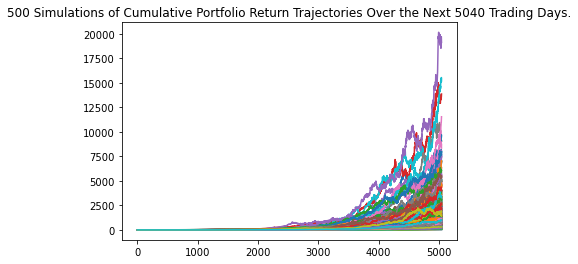

In [9]:
# Plot simulation outcomes
joes_line_plot = joes_MC_even_dist.plot_simulation()

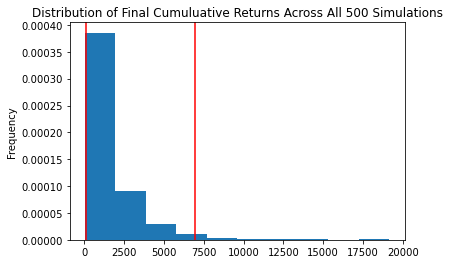

In [10]:
# Plot probability distribution and confidence intervals
joes_dist_plot = joes_MC_even_dist.plot_distribution()

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
joes_even_tbl = joes_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(joes_even_tbl)

count             500.000000
mean             1606.919427
std              1983.813431
min                49.254309
25%               472.708597
50%               968.735733
75%              2028.252338
max             19141.671634
95% CI Lower      106.515965
95% CI Upper     6961.448023
Name: 5040, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments in stocks
joes_even_ci_lower = round(joes_even_tbl[8]*30000,2)
joes_even_ci_upper = round(joes_even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${joes_even_ci_lower} and ${joes_even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 20 years will end within in the range of $3195478.94 and $208843440.69.


Larrys Monte Carlo Simulation

In [13]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
larrys_tickers = ['AA', 'NIO', 'PFE', 'XOM', 'ZNGA']

# Get 5 year's worth of historical price data
larrys_ticker = api.get_barset(
    larrys_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
larrys_ticker.head()

AA                                 NIO           \
                            open    high    low  close   volume open high low   
time                                                                            
2018-05-24 00:00:00-04:00  48.62  49.440  48.55  49.15  1132704  NaN  NaN NaN   
2018-05-25 00:00:00-04:00  48.74  48.825  47.66  47.92  2154178  NaN  NaN NaN   
2018-05-29 00:00:00-04:00  47.57  47.950  46.82  47.30  1599177  NaN  NaN NaN   
2018-05-30 00:00:00-04:00  48.11  48.660  47.50  48.54  1353344  NaN  NaN NaN   
2018-05-31 00:00:00-04:00  49.98  50.430  47.81  48.06  2899262  NaN  NaN NaN   

                                        ...    XOM                       \
                          close volume  ...   open   high    low  close   
time                                    ...                               
2018-05-24 00:00:00-04:00   NaN    NaN  ...  81.35  81.36  79.95  80.26   
2018-05-25 00:00:00-04:00   NaN    NaN  ...  79.28  79.33  78.09  78.70   
2018-05-29 00:00:00-04:00   NaN    NaN  ...  78.15  78.73  77.53  78.40   
2018-05-30 00:00:00-04:00   NaN    NaN  ...  79.25  81.66  79.22  81.51   
2018-05-31 00:00:00-04:00   NaN    NaN  ...  80.81  81.55  80.69  81.24   

                                     ZNGA                                
                             volume  open   high    low close    volume  
time                                                                     
2018-05-24 00:00:00-04:00   9966548  4.14  4.185  4.070  4.15   7431723  
2018-05-25 00:00:00-04:00  10994921  4.12  4.220  4.110  4.18   6848868  
2018-05-29 00:00:00-04:00  10346262  4.16  4.190  4.130  4.19   5380287  
2018-05-30 00:00:00-04:00  12728594  4.20  4.430  4.200  4.33  24457856  
2018-05-31 00:00:00-04:00   9428701  4.34  4.520  4.331  4.41  23173555  

[5 rows x 25 columns]

In [14]:
larrys_mc = MCSimulation(
    portfolio_data = larrys_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 500,
    num_trading_days = 252*20)

In [15]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
larrys_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996764,1.019512,1.020427,0.990647,1.008063,0.991157,1.004257,1.012731,1.004566,1.024141,...,1.003676,1.004107,0.986040,1.002197,1.001939,0.968788,0.979830,0.994661,0.992062,1.018784
2,0.981381,1.018258,1.021442,0.965732,1.003107,0.981792,0.990140,1.042771,0.989178,1.031492,...,0.995444,1.019368,0.987135,0.983654,1.020336,0.954386,0.958235,0.990673,0.958961,1.050550
3,0.953153,1.013500,1.010669,0.972320,1.023720,0.930045,0.997313,1.002704,0.975105,1.025018,...,0.980493,1.027261,0.997246,0.969887,1.029260,0.957281,0.986987,1.008986,0.983861,1.036013
4,0.975806,0.982065,1.022930,0.992508,1.017332,0.942342,0.990976,1.008725,0.982500,1.039908,...,0.981305,1.039924,1.017281,0.977666,1.007799,0.930383,0.964851,0.969510,1.032253,1.054250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,117.241086,91.144562,429.234326,1375.740258,1830.655945,294.808177,122.504866,1733.008566,343.833315,1097.293773,...,264.164893,35.425921,130.727580,222.451578,73.467812,741.446772,494.360421,226.190351,119.159210,413.740364
5037,116.278779,93.350440,416.241537,1397.761628,1880.109092,295.693396,125.011310,1705.595267,351.770957,1071.311676,...,265.665233,34.578067,132.075159,225.006496,71.958228,741.849032,474.998374,226.952526,121.695354,410.223642
5038,116.958782,93.184871,419.748879,1389.891420,1890.943286,295.867779,125.073588,1721.597208,362.068400,1113.453318,...,262.051842,34.181357,135.217324,228.916141,72.023637,734.821050,483.432087,225.991002,125.530716,403.718140
5039,118.477579,94.229324,422.053052,1441.881725,1900.370373,294.610127,124.903421,1722.656530,354.860264,1130.649684,...,262.879533,33.660065,132.933513,230.910498,71.287139,744.865565,483.297312,230.904715,124.000493,407.669839


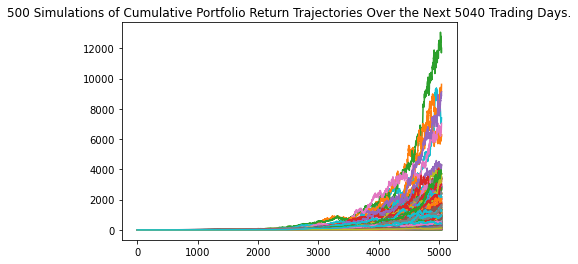

In [16]:
# Plot simulation outcomes
larrys_line_plot = larrys_mc.plot_simulation()

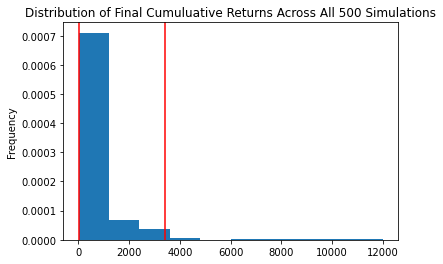

In [17]:
# Plot probability distribution and confidence intervals
larrys_dist_plot = larrys_mc.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
larry_tbl = larrys_mc.summarize_cumulative_return()

# Print summary statistics
print(larry_tbl)

count             500.000000
mean              731.172710
std              1169.376266
min                 7.824899
25%               172.101535
50%               363.483314
75%               796.832841
max             12004.713641
95% CI Lower       41.920911
95% CI Upper     3433.034656
Name: 5040, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
larry_ci_lower = round(larry_tbl[8]*10000,2)
larry_ci_upper = round(larry_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${larry_ci_lower} and ${larry_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $419209.11 and $34330346.56.


ETF Monte Carlo Simulations

In [20]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
etf_tickers = ['ARKF', 'ARKQ', 'ARKK']

# Get 5 year's worth of historical price data
etf_ticker = api.get_barset(
    etf_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
etf_ticker.dropna()
etf_ticker.head()

ARKF                         ARKK                   \
                          open high low close volume   open    high      low   
time                                                                           
2018-05-24 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  43.28  43.500  42.9900   
2018-05-25 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  43.25  43.410  43.0809   
2018-05-29 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  43.00  43.310  42.5935   
2018-05-30 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  43.19  43.750  43.1900   
2018-05-31 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  43.53  43.939  43.1200   

                                             ARKQ                          \
                             close  volume   open     high     low  close   
time                                                                        
2018-05-24 00:00:00-04:00  43.2650  262276  34.03  34.1258  33.761  33.94   
2018-05-25 00:00:00-04:00  43.2000  179988  33.94  34.0524  33.880  34.02   
2018-05-29 00:00:00-04:00  43.0464  184968  33.75  34.0699  33.550  33.80   
2018-05-30 00:00:00-04:00  43.6700  375383  33.86  34.1500  33.860  34.05   
2018-05-31 00:00:00-04:00  43.5200  234545  34.03  34.3090  33.820  33.99   

                                   
                           volume  
time                               
2018-05-24 00:00:00-04:00   20041  
2018-05-25 00:00:00-04:00   16200  
2018-05-29 00:00:00-04:00   63763  
2018-05-30 00:00:00-04:00  119404  
2018-05-31 00:00:00-04:00   16853

In [21]:
# Configure a Monte Carlo simulation to forecast twenty years cumulative returns
etf_MC_even_dist = MCSimulation(
    portfolio_data = etf_ticker,
    weights = [.33, .33, .33],
    num_simulation = 500,
    num_trading_days = 252*20
)

# Print the simulation input data
etf_MC_even_dist.portfolio_data.tail()

ARKF                                      \
                            open     high      low  close     volume   
time                                                                   
2021-05-18 00:00:00-04:00  46.33  47.3400  46.0500  46.67   867199.0   
2021-05-19 00:00:00-04:00  45.14  46.6400  45.0600  46.62  1107666.0   
2021-05-20 00:00:00-04:00  46.97  48.2400  46.9600  48.11  1063897.0   
2021-05-21 00:00:00-04:00  48.57  48.6000  47.6500  47.78   861895.0   
2021-05-24 00:00:00-04:00  47.98  48.8599  47.8001  48.71   835847.0   

                                          ARKK                                \
                          daily_return    open      high       low     close   
time                                                                           
2021-05-18 00:00:00-04:00     0.008427  103.31  107.1900  102.2800  104.7899   
2021-05-19 00:00:00-04:00    -0.001071  100.04  103.2400  100.0300  102.9500   
2021-05-20 00:00:00-04:00     0.031961  104.52  107.1100  104.0499  106.5900   
2021-05-21 00:00:00-04:00    -0.006859  107.75  108.1399  105.7100  105.8100   
2021-05-24 00:00:00-04:00     0.019464  106.83  109.4900  105.9000  108.6800   

                                                   ARKQ                        \
                             volume daily_return   open   high     low  close   
time                                                                            
2021-05-18 00:00:00-04:00  17356171     0.015111  77.07  78.51  76.680  77.24   
2021-05-19 00:00:00-04:00  17594741    -0.017558  75.00  76.92  74.930  76.78   
2021-05-20 00:00:00-04:00  11449311     0.035357  77.45  78.51  77.425  78.34   
2021-05-21 00:00:00-04:00  11058051    -0.007318  78.99  79.30  78.240  78.29   
2021-05-24 00:00:00-04:00   9055412     0.027124  78.43  80.02  78.200  79.49   

                                                
                           volume daily_return  
time                                            
2021-05-18 00:00:00-04:00  411672     0.007960  
2021-05-19 00:00:00-04:00  438770    -0.005955  
2021-05-20 00:00:00-04:00  331406     0.020318  
2021-05-21 00:00:00-04:00  292284    -0.000638  
2021-05-24 00:00:00-04:00  369958     0.015328

In [22]:
# Run a Monte Carlo simulation to forecast twenty years cumulative returns
etf_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998036,0.978957,0.999122,1.010075,0.985875,0.996513,1.013384,0.993737,1.016594,0.996847,...,0.999490,0.989565,1.010456,0.988648,1.010655,0.990801,1.007514,1.011746,0.987285,1.008132
2,1.012076,0.957645,1.007872,0.987565,0.989849,0.998137,1.014019,1.012131,1.011239,1.011467,...,0.996499,0.992563,1.006626,0.989803,1.011756,1.007566,1.010968,0.996093,0.974243,1.004844
3,0.996855,0.936594,0.989146,0.994565,0.997302,1.013572,1.005811,1.030398,1.009579,1.025918,...,0.992303,1.010621,1.023447,0.991310,1.013526,1.003051,1.019851,0.997845,1.005045,0.990966
4,1.007758,0.960547,0.986294,1.007569,1.008758,1.007832,0.983539,1.043675,1.002687,1.024481,...,0.999254,0.990636,1.047530,0.991987,0.990068,1.006155,1.016989,1.013767,1.005442,0.987463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,1173.206836,1872.215090,723.726237,947.798022,1130.960779,3148.670529,175.982473,855.416755,473.872632,347.885019,...,6870.112038,2506.173107,466.964441,873.961038,2721.703932,1399.001301,1115.551095,2069.543553,1569.993327,641.827171
5037,1163.273721,1853.215380,734.710603,970.370862,1149.600170,3154.889246,176.807128,875.976163,475.696184,348.530367,...,6997.226643,2527.793474,472.615907,866.645032,2692.557176,1400.502719,1104.420646,2107.577681,1570.957355,635.486225
5038,1192.800441,1863.290265,732.684418,963.988833,1147.526992,3151.534797,174.572501,890.391333,474.624740,359.687407,...,7018.382061,2543.426853,467.854392,860.693567,2687.328242,1397.597553,1106.430060,2083.102780,1574.988365,624.716391
5039,1181.441188,1852.214985,728.807751,955.520624,1141.585608,3146.283888,175.289547,893.675835,474.521345,361.209298,...,7003.038627,2547.698412,455.465417,855.748269,2676.104549,1379.716726,1106.692908,2044.933888,1578.695375,628.515799


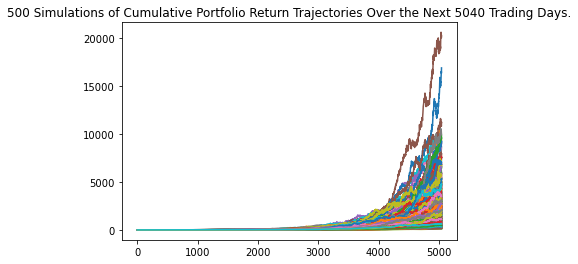

In [23]:
# Plot simulation outcomes
etf_line_plot = etf_MC_even_dist.plot_simulation()

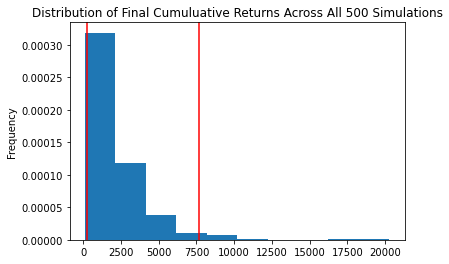

In [24]:
# Plot probability distribution and confidence intervals
etf_dist_plot = etf_MC_even_dist.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
etf_even_tbl = etf_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(etf_even_tbl)

count             500.000000
mean             2142.773556
std              2123.664027
min               113.925384
25%               829.322577
50%              1500.369768
75%              2748.896696
max             20266.766380
95% CI Lower      245.451845
95% CI Upper     7666.548878
Name: 5040, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of a $30,000 investments in ETF
etf_even_ci_lower = round(etf_even_tbl[8]*30000,2)
etf_even_ci_upper = round(etf_even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${etf_even_ci_lower} and ${etf_even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 20 years will end within in the range of $7363555.35 and $229996466.33.
